This code is written to plot graphs, to be used in ReadMe files.

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)

# Combine all text from the DataFrame
text = " ".join(df['question'].tolist() + df['answer'].tolist())

# Tokenize the text
tokens = word_tokenize(text.lower())

# Remove punctuation and stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

# Plot the graph
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Quora Questions and Answers')
plt.xticks(rotation=45)
plt.show()


In [10]:
#pip install wordcloud


In [11]:
#pip install vaderSentiment


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cshar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cshar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


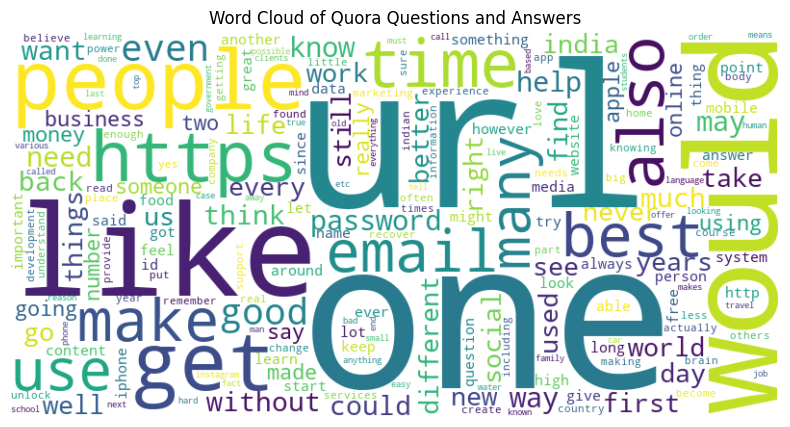

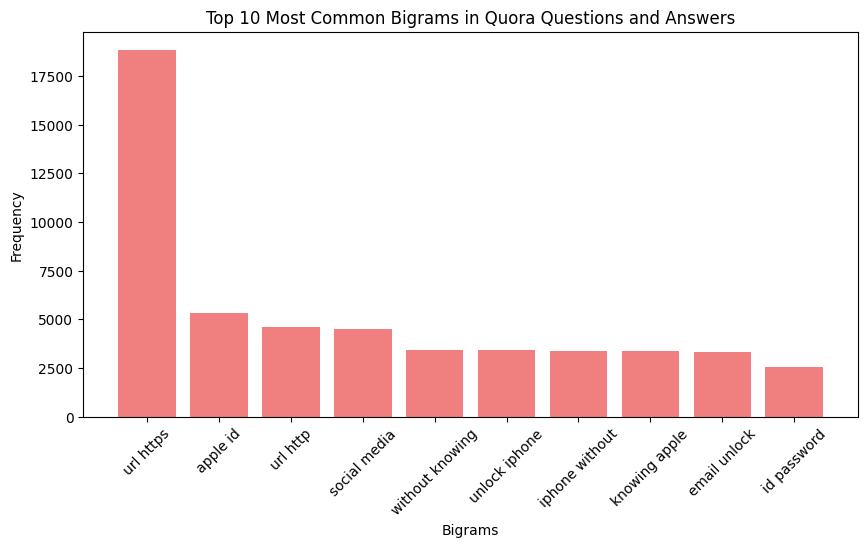

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.util import ngrams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)

# Combine all text from the DataFrame
text = " ".join(df['question'].tolist() + df['answer'].tolist())

# Tokenize the text
tokens = word_tokenize(text.lower())

# Remove punctuation and stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Quora Questions and Answers')
plt.show()

# Generate bigrams
bigrams = ngrams(filtered_tokens, 2)
bigram_counts = Counter(bigrams)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)
bigrams, counts = zip(*most_common_bigrams)
bigram_words = [' '.join(bigram) for bigram in bigrams]

# Plot the graph
plt.figure(figsize=(10, 5))
plt.bar(bigram_words, counts, color='lightcoral')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Bigrams in Quora Questions and Answers')
plt.xticks(rotation=45)
plt.show()

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores for each question and answer
sentiments = df['question'].apply(lambda x: analyzer.polarity_scores(x)['compound']).tolist() + \
             df['answer'].apply(lambda x: analyzer.polarity_scores(x)['compound']).tolist()

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 5))
plt.hist(sentiments, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution of Quora Questions and Answers')
plt.show()

# Compute question lengths
question_lengths = df['question'].apply(lambda x: len(x.split()))

# Plot the distribution of question lengths
plt.figure(figsize=(10, 5))
plt.hist(question_lengths, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Question Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths in Quora Dataset')
plt.show()
